X_train size 60000, X_test size 10000


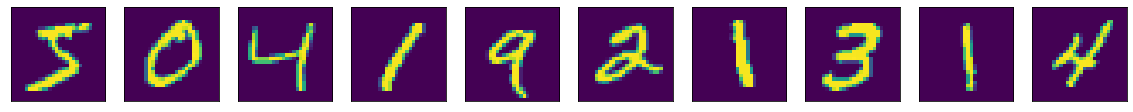

In [18]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,  y_train), (x_test, y_test) = mnist.load_data()

x_train_top = x_train[:10]

print("X_train size %s, X_test size %s" % (len(x_train), len(x_test)))

plt.figure(figsize=(20, 4))
for index in range(len(x_train_top)):
    # display original
    ax = plt.subplot(2, len(x_train_top), index + 1)
    plt.imshow(x_train_top[index])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [20]:
import pandas as pd
from keras.utils import to_categorical

y_train = pd.get_dummies(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.utils import plot_model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

# plot_model(model, show_shapes=True)

In [22]:
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 148us/step - loss: 0.2583 - accuracy: 0.9201 - val_loss: 0.0536 - val_accuracy: 0.9831
Epoch 2/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 3/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.0644 - accuracy: 0.9808 - val_loss: 0.0348 - val_accuracy: 0.9886
Epoch 4/15
60000/60000 [==============================] - 9s 147us/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0359 - val_accuracy: 0.9875
Epoch 5/15
60000/60000 [==============================] - 9s 154us/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0309 - val_accuracy: 0.9889
Epoch 6/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 7/15
60000/60000 [==============================] - 9s 1

In [23]:
score = model.evaluate(x_test, y_test)
print("Loss: %s Acc: %s" % (score[0], score[1]))

10000/10000 [==============================] - 1s 123us/step
Loss: 0.027067949370100087 Acc: 0.9914000034332275


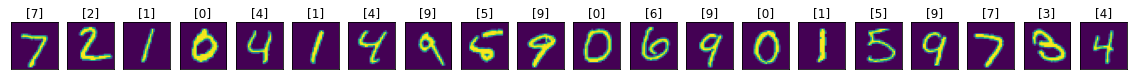

In [24]:
import numpy as np


y_pred = model.predict(x_test)
x_show = x_test[:20]

plt.figure(figsize=(20, 4))
for index in range(len(x_show)):
    y = np.where(y_pred[index] == max(y_pred[index]))[0]
    ax = plt.subplot(2, len(x_show),index + 1, title=str(y))
    

    plt.imshow(x_show[index].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

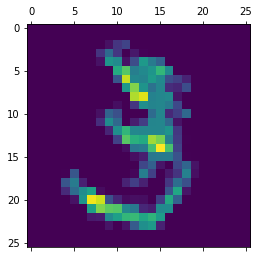

In [33]:
from keras.models import Model


layers = [ layer.output for layer in model.layers ]

activation_model = Model(inputs= model.input, outputs = layers)
activations = activation_model.predict(x_train[10].reshape(1, 28, 28, 1))
activation_layer = activations[0]

plt.matshow(activation_layer[0, :, :, 18], cmap='viridis')

In [34]:
!pip install VisualiseKerasLayers

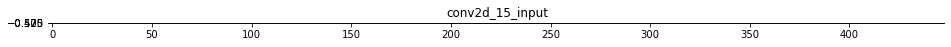

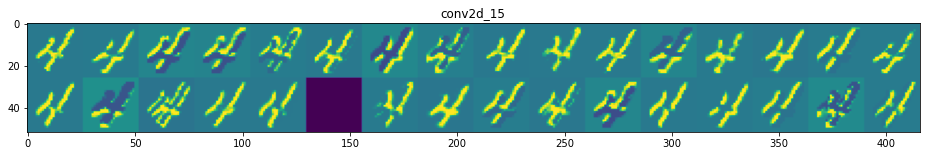

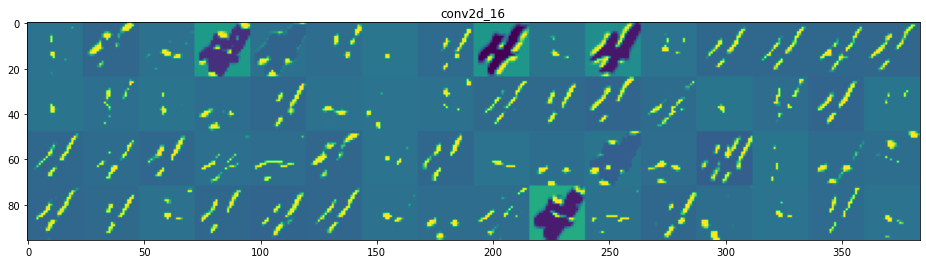

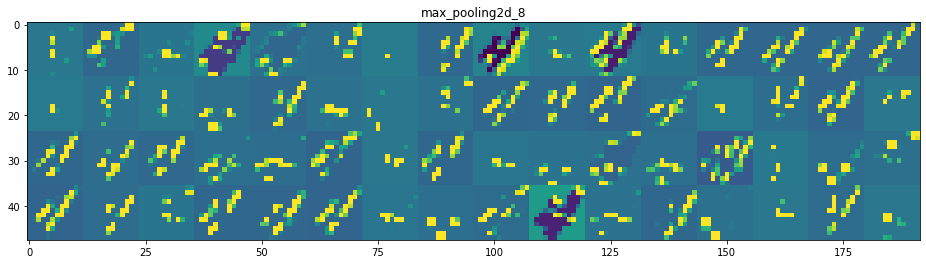

In [36]:
from VisualiseKerasLayers import display_activations_grid


display_activations_grid(activation_model, x_train[9])